# The effects of Covid19 on Israel's Public Transportation

#### Shachar Daya, Ella Tamir, Gal Zivoni 
#### Advisor: Prof Eran Toch
##### Tel - Aviv University, Department of Industrial Engineering

In the following code we used three regression models - Linear, Ridge & Lasso.
The data that was used describes the number of travels in buses in israel during the years 2019 - 2021. This information is public and can be found at https://data.gov.il/dataset/tikufim-2021.

Information about the Data concerning Covid19, Unemployment, Stringency index can be found at https://github.com/GalZivoni/TAU-2022-Project-Public-Transportation.

Further information, Analysis and discussion can be found (in hebrew) in the document which is in the git repository above.

In [1]:
# Imports:
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, RidgeCV, LarsCV, Ridge, Lasso, LassoCV
from regressors import stats  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the data
df = pd.read_excel('Data_significance_national.xlsx')
df

,Week of Day of full date,Value,Avg weekly percentage Covid19 positives,Avg weekly new Covid19 positives,Avg weekly critical patients,Total hospitalized,Avg Stringency Index,Avg daily stringency lockdown,Avg daily percentage change work-place arrival,Avg daily stringency schools,Avg daily stringency work-place restrictions,No. of workdays,Avg monthly unemployment percentage adjusted,Early,Intact,Late,Not Authorized,Not Performed,Weekly bus travels
0,30/12/2018,11208688,0.000000,0,0,0,0.000000,0.0,0.000000,0.0,0.0,3,4.300000,1309,303490,6236,2119,20400,333554
1,06/01/2019,17320102,0.000000,0,0,0,0.000000,0.0,0.000000,0.0,0.0,5,4.300000,2395,475198,11438,6856,31676,527563
2,13/01/2019,17158554,0.000000,0,0,0,0.000000,0.0,0.000000,0.0,0.0,5,4.300000,2587,480024,10568,6344,30877,530400
3,20/01/2019,18021392,0.000000,0,0,0,0.000000,0.0,0.000000,0.0,0.0,5,4.300000,2795,482209,9917,6274,30053,531248
4,27/01/2019,17879717,0.000000,0,0,0,0.000000,0.0,0.000000,0.0,0.0,5,4.242857,2490,480590,10138,18066,30558,541842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,28/11/2021,14971004,518.857143,3632,793,1721,56.082857,0.0,-11.469429,2.0,2.0,5,4.228571,902,537341,9030,3249,13879,564401
153,05/12/2021,15219328,613.571429,4295,692,1946,56.480000,0.0,-16.836857,2.0,2.0,5,4.100000,701,547796,7398,2348,11456,569699
154,12/12/2021,15485942,698.000000,4886,581,2555,56.480000,0.0,-5.939000,2.0,2.0,5,4.100000,779,542871,6888,1772,10317,562627
155,19/12/2021,13955327,1296.571429,9076,561,4129,56.480000,0.0,-8.816143,2.0,2.0,5,4.100000,729,543912,7641,1701,12713,566696


In [3]:
value = df[["Value"]]
labels = ["Avg weekly percentage Covid19 positives", "Avg weekly new Covid19 positives", "Avg weekly critical patients",
          "Total hospitalized", "Avg Stringency Index", "Avg daily stringency lockdown", 
          "Avg daily percentage change work-place arrival", "Avg daily stringency schools", 
          "Avg daily stringency work-place restrictions", "No. of workdays", 
          "Avg monthly unemployment percentage adjusted", "Early", "Intact", "Late", "Not Authorized",
          "Not Performed", "Weekly bus travels"]

features = df[labels]

In [4]:
features

,Avg weekly percentage Covid19 positives,Avg weekly new Covid19 positives,Avg weekly critical patients,Total hospitalized,Avg Stringency Index,Avg daily stringency lockdown,Avg daily percentage change work-place arrival,Avg daily stringency schools,Avg daily stringency work-place restrictions,No. of workdays,Avg monthly unemployment percentage adjusted,Early,Intact,Late,Not Authorized,Not Performed,Weekly bus travels
0,0.000000,0,0,0,0.000000,0.0,0.000000,0.0,0.0,3,4.300000,1309,303490,6236,2119,20400,333554
1,0.000000,0,0,0,0.000000,0.0,0.000000,0.0,0.0,5,4.300000,2395,475198,11438,6856,31676,527563
2,0.000000,0,0,0,0.000000,0.0,0.000000,0.0,0.0,5,4.300000,2587,480024,10568,6344,30877,530400
3,0.000000,0,0,0,0.000000,0.0,0.000000,0.0,0.0,5,4.300000,2795,482209,9917,6274,30053,531248
4,0.000000,0,0,0,0.000000,0.0,0.000000,0.0,0.0,5,4.242857,2490,480590,10138,18066,30558,541842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,518.857143,3632,793,1721,56.082857,0.0,-11.469429,2.0,2.0,5,4.228571,902,537341,9030,3249,13879,564401
153,613.571429,4295,692,1946,56.480000,0.0,-16.836857,2.0,2.0,5,4.100000,701,547796,7398,2348,11456,569699
154,698.000000,4886,581,2555,56.480000,0.0,-5.939000,2.0,2.0,5,4.100000,779,542871,6888,1772,10317,562627
155,1296.571429,9076,561,4129,56.480000,0.0,-8.816143,2.0,2.0,5,4.100000,729,543912,7641,1701,12713,566696


In [5]:
value

,Value
0,11208688
1,17320102
2,17158554
3,18021392
4,17879717
...,...
152,14971004
153,15219328
154,15485942
155,13955327


In [6]:
# Converting to numpy arrays:
features_np = features.to_numpy()
value_np = value.to_numpy()

### Linear Regression: 

Using the Sklearn model for linear regression.

In [7]:
Linear_reg = linear_model.LinearRegression()
Linear_reg.fit(features_np, value_np)
linear_r_sq = Linear_reg.score(features_np, value_np)

# Printing R^2
print('coefficient of determination:', linear_r_sq)

coefficient of determination: 0.9371317789369891


In [8]:
linear_adj_r_sq = stats.adj_r2_score(Linear_reg, features_np, value_np)

# Printing R^2 adjusted
print('adjusted coefficient of determination:', linear_adj_r_sq)

adjusted coefficient of determination: 0.9294428598141748


In [9]:
linear_reg_intercept = Linear_reg.intercept_
print("Linear regression intercept is: ", linear_reg_intercept)

Linear regression intercept is:  [4443257.14061563]


In [10]:
linear_reg_coef = Linear_reg.coef_
print("Linear regression coefs are: ", linear_reg_coef)

Linear regression coefs are:  [[-9.85775695e+14  1.40825099e+14 -1.56409306e+02 -1.58146288e+02
  -4.66308234e+04 -7.79465808e+05  1.10763574e+05 -4.41929053e+05
   1.04732650e+06  1.28846798e+06  5.00297560e+05  5.45603890e+04
   5.46248069e+04  5.48636051e+04  5.46194689e+04  5.46021021e+04
  -5.46191125e+04]]


In [11]:
new_labels = ['inter']
new_labels += [label for label in labels]

In [12]:
# Matching the coefs with the labels
coefs = linear_reg_coef[0].tolist()
d = {'Var': labels, 'coef': coefs}
coefs_pd = pd.DataFrame(d)
coefs_pd

,Var,coef
0,Avg weekly percentage Covid19 positives,-9.857757e+14
1,Avg weekly new Covid19 positives,1.408251e+14
2,Avg weekly critical patients,-1.564093e+02
3,Total hospitalized,-1.581463e+02
4,Avg Stringency Index,-4.663082e+04
5,Avg daily stringency lockdown,-7.794658e+05
6,Avg daily percentage change work-place arrival,1.107636e+05
7,Avg daily stringency schools,-4.419291e+05
8,Avg daily stringency work-place restrictions,1.047327e+06
9,No. of workdays,1.288468e+06


In [13]:
# P values
p_values_regression = stats.coef_pval(Linear_reg, features_np, value_np)
regression_p_values = pd.DataFrame(list(zip(new_labels, p_values_regression)), columns =['Features','P_value'])
regression_p_values

,Features,P_value
0,inter,3.444578e-03
1,Avg weekly percentage Covid19 positives,0.000000e+00
2,Avg weekly new Covid19 positives,0.000000e+00
3,Avg weekly critical patients,1.629556e-01
4,Total hospitalized,2.018373e-02
5,Avg Stringency Index,4.018241e-10
6,Avg daily stringency lockdown,2.437341e-04
7,Avg daily percentage change work-place arrival,2.664535e-15
8,Avg daily stringency schools,1.910428e-01
9,Avg daily stringency work-place restrictions,2.364119e-02


In [14]:
# Significant variables
features_regression = regression_p_values[regression_p_values.P_value <0.05]
features_regression

,Features,P_value
0,inter,3.444578e-03
1,Avg weekly percentage Covid19 positives,0.000000e+00
2,Avg weekly new Covid19 positives,0.000000e+00
4,Total hospitalized,2.018373e-02
5,Avg Stringency Index,4.018241e-10
6,Avg daily stringency lockdown,2.437341e-04
7,Avg daily percentage change work-place arrival,2.664535e-15
9,Avg daily stringency work-place restrictions,2.364119e-02
10,No. of workdays,1.459621e-10
11,Avg monthly unemployment percentage adjusted,1.096945e-02


### Ridge Regression:

Using the sklearn model.

In [15]:
Ridge_reg = Ridge()
Ridge_reg.fit(features_np, value_np)
Ridge_reg.get_params()
ridge_r_sq = Ridge_reg.score(features_np, value_np)
print('regression score:', ridge_r_sq)

regression score: 0.9348073446430291


In [16]:
ridge_adj_r_sq = stats.adj_r2_score(Ridge_reg, features_np, value_np)
print('adjusted coefficient of determination:', ridge_adj_r_sq)

adjusted coefficient of determination: 0.9268341421892988


In [17]:
Ridge_reg_intercept = Ridge_reg.intercept_
print("Ridge regression intercept is: ", Ridge_reg_intercept)

Ridge regression intercept is:  [4982921.34945767]


In [18]:
Ridge_reg_coef = Ridge_reg.coef_
print("Ridge regression coefs are: ", Ridge_reg_coef)

Ridge regression coefs are:  [[ 6.70156776e+00  4.81849355e+01 -1.45483596e+02 -1.59735957e+02
  -4.31606627e+04 -7.50002015e+05  1.15370654e+05 -3.27043953e+05
   8.47221288e+05  1.18953090e+06  4.55269311e+05 -5.89265610e+04
  -5.88498148e+04 -5.86184887e+04 -5.88600968e+04 -5.88743710e+04
   5.88560914e+04]]


In [19]:
coefs = Ridge_reg_coef[0].tolist()
d = {'Var': labels, 'coef': coefs}
coefs_pd = pd.DataFrame(d)
coefs_pd

,Var,coef
0,Avg weekly percentage Covid19 positives,6.701568e+00
1,Avg weekly new Covid19 positives,4.818494e+01
2,Avg weekly critical patients,-1.454836e+02
3,Total hospitalized,-1.597360e+02
4,Avg Stringency Index,-4.316066e+04
5,Avg daily stringency lockdown,-7.500020e+05
6,Avg daily percentage change work-place arrival,1.153707e+05
7,Avg daily stringency schools,-3.270440e+05
8,Avg daily stringency work-place restrictions,8.472213e+05
9,No. of workdays,1.189531e+06


In [20]:
new_labels = ['inter']
new_labels += [label for label in labels]
p_values_ridge = stats.coef_pval(Ridge_reg, features_np, value_np)

Ridge_p_values = pd.DataFrame(list(zip(new_labels, p_values_ridge)), columns =['Features','P_value'])
Ridge_p_values

,Features,P_value
0,inter,1.317900e-03
1,Avg weekly percentage Covid19 positives,1.000000e+00
2,Avg weekly new Covid19 positives,9.999989e-01
3,Avg weekly critical patients,2.021892e-01
4,Total hospitalized,2.101306e-02
5,Avg Stringency Index,9.341064e-09
6,Avg daily stringency lockdown,5.119591e-04
7,Avg daily percentage change work-place arrival,8.881784e-16
8,Avg daily stringency schools,3.413896e-01
9,Avg daily stringency work-place restrictions,7.137950e-02


In [21]:
features_ridge = Ridge_p_values[Ridge_p_values.P_value <0.05]
features_ridge

,Features,P_value
0,inter,1.317900e-03
4,Total hospitalized,2.101306e-02
5,Avg Stringency Index,9.341064e-09
6,Avg daily stringency lockdown,5.119591e-04
7,Avg daily percentage change work-place arrival,8.881784e-16
10,No. of workdays,4.227037e-09
11,Avg monthly unemployment percentage adjusted,2.273798e-02


### Lasso Regression: 

In [22]:
Lasso_reg = Lasso()
Lasso_reg.fit(features_np, value_np)
Lasso_reg.get_params()
lasso_r_sq = Lasso_reg.score(features_np, value_np)
print('regression score:', lasso_r_sq)

regression score: 0.9348574819025821


D:\Users\ela86\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104761478988171.25, tolerance: 321867440932.399
  model = cd_fast.enet_coordinate_descent(


In [23]:
lasso_adj_r_sq = stats.adj_r2_score(Lasso_reg, features_np, value_np)
print('adjusted coefficient of determination:', lasso_adj_r_sq)

adjusted coefficient of determination: 0.9268904113439052


In [24]:
Lasso_reg_intercept = Lasso_reg.intercept_
Lasso_reg_intercept

array([4799472.35378915])

In [25]:
Lasso_reg_coef = Lasso_reg.coef_
Lasso_reg_coef

array([ 3.45180487e+02,  2.58486729e-05, -1.58350847e+02, -1.59442528e+02,
       -4.50414677e+04, -7.80990346e+05,  1.13750909e+05, -3.96208378e+05,
        9.99987276e+05,  1.21846988e+06,  4.53771955e+05, -8.96210520e+01,
        8.55899903e+00,  2.39665664e+02, -1.92626972e+00, -1.12986637e+01,
       -2.35912836e+00])

In [26]:
coefs = Lasso_reg_coef.tolist()
d = {'Var': labels, 'coef': coefs}
coefs_pd = pd.DataFrame(d)
coefs_pd

,Var,coef
0,Avg weekly percentage Covid19 positives,3.451805e+02
1,Avg weekly new Covid19 positives,2.584867e-05
2,Avg weekly critical patients,-1.583508e+02
3,Total hospitalized,-1.594425e+02
4,Avg Stringency Index,-4.504147e+04
5,Avg daily stringency lockdown,-7.809903e+05
6,Avg daily percentage change work-place arrival,1.137509e+05
7,Avg daily stringency schools,-3.962084e+05
8,Avg daily stringency work-place restrictions,9.999873e+05
9,No. of workdays,1.218470e+06


In [27]:
new_labels = ['inter']
new_labels += [label for label in labels]
p_values_lasso = stats.coef_pval(Lasso_reg, features_np, value_np)

Lasso_p_values = pd.DataFrame(list(zip(new_labels, p_values_lasso)), columns =['Features','P_value'])
Lasso_p_values

,Features,P_value
0,inter,1.944433e-03
1,Avg weekly percentage Covid19 positives,9.999998e-01
2,Avg weekly new Covid19 positives,1.000000e+00
3,Avg weekly critical patients,1.652905e-01
4,Total hospitalized,2.149584e-02
5,Avg Stringency Index,2.395503e-09
6,Avg daily stringency lockdown,3.020226e-04
7,Avg daily percentage change work-place arrival,1.554312e-15
8,Avg daily stringency schools,2.492005e-01
9,Avg daily stringency work-place restrictions,3.361533e-02


In [28]:
features_lasso = Lasso_p_values[Lasso_p_values.P_value <0.05]
features_lasso

,Features,P_value
0,inter,1.944433e-03
4,Total hospitalized,2.149584e-02
5,Avg Stringency Index,2.395503e-09
6,Avg daily stringency lockdown,3.020226e-04
7,Avg daily percentage change work-place arrival,1.554312e-15
9,Avg daily stringency work-place restrictions,3.361533e-02
10,No. of workdays,1.915192e-09
11,Avg monthly unemployment percentage adjusted,2.312887e-02


## Comparison: 

### 1) Comparing R results: 

In [29]:
regressions = ["Linear", "Ridge", "Lasso"]
# r_sq = [linear_r_sq, ridge_r_sq, lasso_r_sq]
# adj_r_sq = [linear_adj_r_sq, ridge_adj_r_sq, lasso_adj_r_sq]
r_sq = [round(i*100,2) for i in (linear_r_sq, ridge_r_sq, lasso_r_sq)]
adj_r_sq = [round(i*100, 2) for i in (linear_adj_r_sq, ridge_adj_r_sq, lasso_adj_r_sq)]
adj_r_sq

[92.94, 92.68, 92.69]

In [30]:
reg_r_sq_res = pd.DataFrame(list(zip(r_sq, adj_r_sq)), columns =['r_sq', 'adj_r_sq'])
reg_r_sq_res.index = ['Linear', 'Ridge', 'Lasso']
reg_r_sq_res

,r_sq,adj_r_sq
Linear,93.71,92.94
Ridge,93.48,92.68
Lasso,93.49,92.69


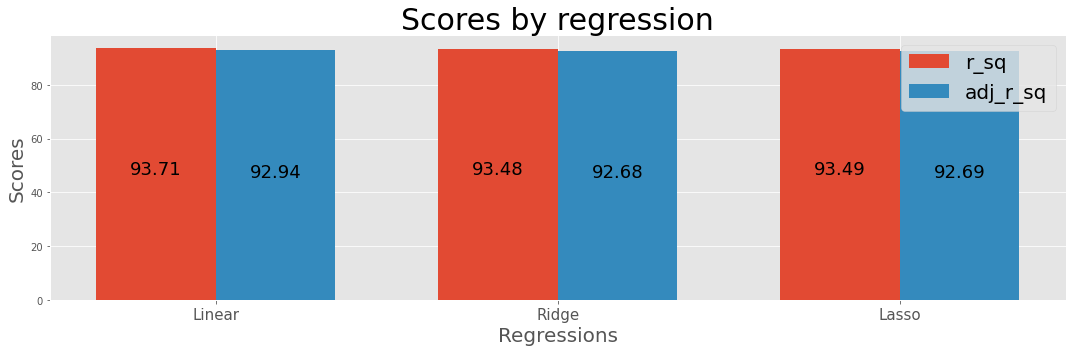

In [31]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,5))
x = np.arange(len(regressions))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, r_sq, width, label='r_sq')
rects2 = ax.bar(x + width/2, adj_r_sq, width, label='adj_r_sq')
ax.set_ylabel('Scores', size = 20)
ax.set_title('Scores by regression', size = 30)
ax.set_xlabel('Regressions', size = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels =["Linear", "Ridge", "Lasso"], size = 15)
ax.legend(fontsize=20)


ax.bar_label(rects1, padding=5, label_type='center', size = 18)
ax.bar_label(rects2, padding=3, label_type='center', size = 18)

fig.tight_layout()

plt.show()

### 2) Comparing P values:

In [32]:
p_values = pd.DataFrame(list(zip(p_values_regression, p_values_ridge, p_values_lasso)), columns = ["regression_p_values", "Ridge_p_values", "Lasso_p_values"])
p_values.index = new_labels
p_values

,regression_p_values,Ridge_p_values,Lasso_p_values
inter,3.444578e-03,1.317900e-03,1.944433e-03
Avg weekly percentage Covid19 positives,0.000000e+00,1.000000e+00,9.999998e-01
Avg weekly new Covid19 positives,0.000000e+00,9.999989e-01,1.000000e+00
Avg weekly critical patients,1.629556e-01,2.021892e-01,1.652905e-01
Total hospitalized,2.018373e-02,2.101306e-02,2.149584e-02
Avg Stringency Index,4.018241e-10,9.341064e-09,2.395503e-09
Avg daily stringency lockdown,2.437341e-04,5.119591e-04,3.020226e-04
Avg daily percentage change work-place arrival,2.664535e-15,8.881784e-16,1.554312e-15
Avg daily stringency schools,1.910428e-01,3.413896e-01,2.492005e-01
Avg daily stringency work-place restrictions,2.364119e-02,7.137950e-02,3.361533e-02


In [33]:
def distinct_feature(cell_value):

    highlight = 'background-color: yellow;'
    default = ''

    if type(cell_value) in [float, int]:
        if cell_value <0.05:
            return highlight
    return default

p_values.style.applymap(distinct_feature)

,regression_p_values,Ridge_p_values,Lasso_p_values
inter,0.003445,0.001318,0.001944
Avg weekly percentage Covid19 positives,0.000000,1.000000,1.000000
Avg weekly new Covid19 positives,0.000000,0.999999,1.000000
Avg weekly critical patients,0.162956,0.202189,0.165291
Total hospitalized,0.020184,0.021013,0.021496
Avg Stringency Index,0.000000,0.000000,0.000000
Avg daily stringency lockdown,0.000244,0.000512,0.000302
Avg daily percentage change work-place arrival,0.000000,0.000000,0.000000
Avg daily stringency schools,0.191043,0.341390,0.249201
Avg daily stringency work-place restrictions,0.023641,0.071380,0.033615
